# データ可視化

## 参考
https://www.kaggle.com/hugosjoberg/house-prices-prediction-using-keras
    

# データ読み込み

In [1]:
import pandas as pd
import numpy as np

# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data より
origin_train = pd.read_csv("./data/house-prices-advanced-regression-techniques/train.csv")
origin_test = pd.read_csv("./data/house-prices-advanced-regression-techniques/test.csv")


# データ確認

In [2]:
# ndarrayの最大表示数
np.set_printoptions(threshold=1000)
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
origin_train.info()
print("-------------------------------------------")
print(origin_train.isnull().sum())
print("-------------------------------------------")
print(origin_train.isnull().sum())
print("-------------------------------------------")
origin_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
import seaborn as sns
sns.distplot(origin_train['SalePrice'])
origin_train['SalePrice'].describe()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [3]:
print(origin_train['MSZoning'].describe())
print("-----------------")
print(origin_train['LotFrontage'].describe())
print("-----------------")
print(origin_train['Alley'].describe())
print("-----------------")
print(origin_train['Utilities'].describe())
print("-----------------")
print(origin_train['Exterior1st'].describe())
print("-----------------")
print(origin_train['Exterior2nd'].describe())
print("-----------------")
print(origin_train['MasVnrType'].describe())
print("-----------------")
print(origin_train['MasVnrArea'].describe())
print("-----------------")
print(origin_train['BsmtQual'].describe())
print("-----------------")
print(origin_train['BsmtCond'].describe())
print("-----------------")
print(origin_train['BsmtExposure'].describe())
print("-----------------")
print(origin_train['BsmtFinType1'].describe())
print("-----------------")
print(origin_train['BsmtFinSF1'].describe())
print("-----------------")
print(origin_train['BsmtFinType2'].describe())
print("-----------------")
print(origin_train['BsmtFinSF2'].describe())
print("-----------------")
print(origin_train['Electrical'].describe())
print("-----------------")
print(origin_train['BsmtUnfSF'].describe())
print("-----------------")
print(origin_train['TotalBsmtSF'].describe())
print("-----------------")
print(origin_train['BsmtFullBath'].describe())
print("-----------------")
print(origin_train['BsmtHalfBath'].describe())
print("-----------------")
print(origin_train['KitchenQual'].describe())
print("-----------------")
print(origin_train['Functional'].describe())
print("-----------------")
print(origin_train['FireplaceQu'].describe())
print("-----------------")
print(origin_train['GarageType'].describe())
print("-----------------")
print(origin_train['GarageYrBlt'].describe())
print("-----------------")
print(origin_train['GarageFinish'].describe())
print("-----------------")
print(origin_train['GarageCars'].describe())
print("-----------------")
print(origin_train['GarageArea'].describe())
print("-----------------")
print(origin_train['GarageQual'].describe())
print("-----------------")
print(origin_train['GarageCond'].describe())
print("-----------------")
print(origin_train['PoolQC'].describe())
print("-----------------")
print(origin_train['Fence'].describe())
print("-----------------")
print(origin_train['MiscFeature'].describe())
print("-----------------")
print(origin_train['SaleType'].describe())

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
-----------------
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
-----------------
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
-----------------
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
-----------------
count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object
-----------------
count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object
-----------------
count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
-----------------
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%       

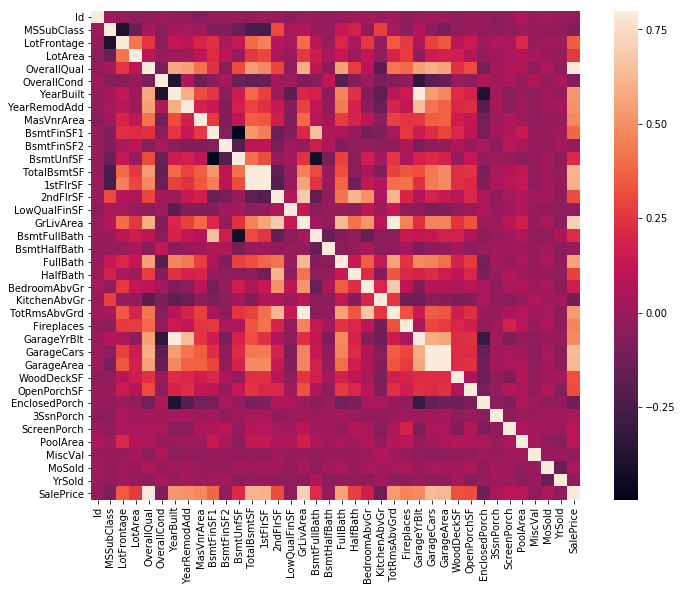

In [4]:
import matplotlib.pyplot as plt
corrmat = origin_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

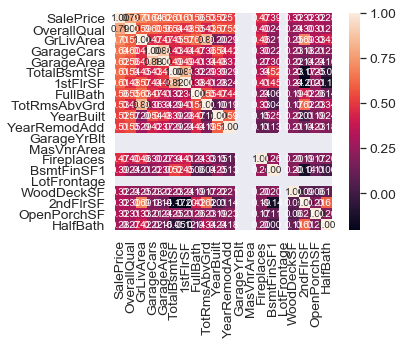

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
corrmat = origin_train.corr()
# 関連が大きい順に
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(origin_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


# 確認用 分類ごとに分かれている項目

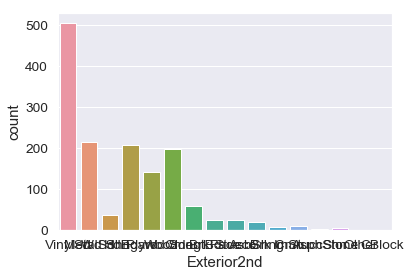

In [139]:
# sns.countplot(x='MSSubClass', data = origin_train)
# sns.countplot(x='MSZoning', data = origin_train)
# sns.countplot(x='Street', data = origin_train)
# sns.countplot(x='Alley', data = origin_train)
# sns.countplot(x='LotShape', data = origin_train)
# sns.countplot(x='LandContour', data = origin_train)
# sns.countplot(x='BldgType', data = origin_train)
# sns.countplot(x='Utilities', data = origin_train)
# sns.countplot(x='LotConfig', data = origin_train)
# sns.countplot(x='LandSlope', data = origin_train)
# sns.countplot(x='RoofStyle', data = origin_train)
# sns.countplot(x='Exterior1st', data = origin_train)
sns.countplot(x='Exterior2nd', data = origin_train)
# sns.countplot(x='ExterCond', data = origin_train)
# sns.countplot(x='MasVnrType', data = origin_train)
# sns.countplot(x='BsmtQual', data = origin_train)
# sns.countplot(x='BsmtCond', data = origin_train)
# sns.countplot(x='BsmtExposure', data = origin_train)
# sns.countplot(x='BsmtFinType1', data = origin_train)
# sns.countplot(x='BsmtFinType2', data = origin_train)
# sns.countplot(x='Electrical', data = origin_train)


# sns.countplot(x='Utilities', data = origin_test)
# sns.countplot(x='Exterior1st', data = origin_test)
# sns.countplot(x='Exterior2nd', data = origin_test)
# sns.countplot(x='MasVnrType', data = origin_test)
# sns.countplot(x='BsmtQual', data = origin_test)
# sns.countplot(x='BsmtCond', data = origin_test)
# sns.countplot(x='BsmtExposure', data = origin_test)
# sns.countplot(x='BsmtFinType1', data = origin_test)
# sns.countplot(x='BsmtFinType2', data = origin_test)
# sns.countplot(x='Electrical', data = origin_test)
# sns.countplot(x='KitchenQual', data = origin_test)
# sns.countplot(x='Functional', data = origin_test)
# sns.countplot(x='SaleType', data = origin_test)


# 確認用 数値を持つ項目

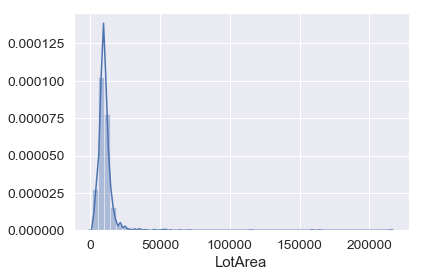

In [121]:
import seaborn as sns
train2 = origin_train.copy()
test2 = origin_test.copy()

sns.distplot(train2.LotArea.dropna())

# sns.distplot(train2.LotFrontage.dropna())
# sns.distplot(test2.LotFrontage.dropna())

# sns.distplot(train2.MasVnrArea.dropna())
# sns.distplot(test2.MasVnrArea.dropna())

# sns.distplot(train2.BsmtFinSF1.dropna())
# sns.distplot(test2.BsmtFinSF1.dropna())

# sns.distplot(train2.BsmtUnfSF.dropna())
# sns.distplot(test2.BsmtUnfSF.dropna())

# sns.distplot(train2.TotalBsmtSF.dropna())
# sns.distplot(test2.TotalBsmtSF.dropna())

# sns.distplot(train2.BsmtFullBath.dropna())
# sns.distplot(test2.BsmtFullBath.dropna())

# sns.distplot(train2.HalfBath.dropna())
# sns.distplot(test2.HalfBath.dropna())

# sns.distplot(train2.GarageYrBlt.dropna())
# sns.distplot(test2.GarageYrBlt.dropna())
# test2[test2['GarageYrBlt']>2010]

# sns.distplot(train2.GarageCars.dropna())
# sns.distplot(test2.GarageCars.dropna())
# test2[test2['GarageCars'].isnull()]

# sns.distplot(train2.GarageArea.dropna())
# sns.distplot(test2.GarageArea.dropna())
# test2[test2['GarageArea'].isnull()]




# データ内訳

## 欠損 Missing Value

A. 中央値を設定。  
B. もっとも多い項目を設定。  
C. 0を設定。  
D. データごと削除。  
E. 別途値を設定。  
F. 対象外  
G. 個別に処理

### train
- A LotFrontage       259
- E Alley            1369
- B MasVnrType          8
- C MasVnrArea          8
- B BsmtQual           37
- E BsmtCond           37
- E BsmtExposure       38
- E BsmtFinType1       37
- E BsmtFinType2       38
- B Electrical          1
- E FireplaceQu       690
- E GarageType         81
- C GarageYrBlt        81
- C GarageFinish       81
- E GarageQual         81
- E GarageCond         81
- E PoolQC           1453
- E Fence            1179
- E MiscFeature      1406

### test
- B MSZoning            4
- A LotFrontage       227
- E Alley            1352
- F Utilities           2
- B Exterior1st         1
- B Exterior2nd         1
- B MasVnrType         16
- C MasVnrArea         15
- B BsmtQual           44
- E BsmtCond           45
- E BsmtExposure       44
- E BsmtFinType1       42
- C BsmtFinSF1          1
- E BsmtFinType2       42
- C BsmtFinSF2          1
- A BsmtUnfSF           1
- A TotalBsmtSF         1
- B BsmtFullBath        2
- B BsmtHalfBath        2
- B KitchenQual         1
- B Functional          2
- E FireplaceQu       730
- E GarageType         76
- CG GarageYrBlt        78
- CG GarageFinish       78
- G GarageCars          1
- G GarageArea          1
- E GarageQual         78
- E GarageCond         78
- E PoolQC           1456
- E Fence            1169
- E MiscFeature      1408
- B SaleType            1

## SalePriceとの相関昇順 Correlation

1. 0.79 OverallQual：全体的な素材と仕上げの品質
2. 0.71 GrLivArea：上階（地面）のリビングエリア平方フィート
3. 0.64 GarageCars：車庫のサイズ
4. 0.62 GarageArea：車庫サイズ（平方フィート）
5. 0.61 TotalBsmtSF：地下室の総平方フィート
6. 0.61 1stFlrSF：1階平方フィート
7. 0.56 FullBath：グレード以上のフルバスルーム
8. 0.53 TotRmsAbvGrd：グレード以上の総客室数（バスルームは含まれません）
9. 0.52 YearBuilt：建設日


In [6]:

train = origin_train.copy()
test = origin_test.copy()

del train['Id']
del train['Utilities']

del test['Id']
del test['Utilities']


    
train.MSSubClass = train.MSSubClass.replace([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160 , 180, 190], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
train.MSZoning = train.MSZoning.replace(['A', 'C (all)', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], [0, 1, 2, 3, 4, 5, 6, 7])
train.LotFrontage = train.LotFrontage.fillna(train.LotFrontage.median())
train.Street = train.Street.replace(['Grvl', 'Pave'], [0, 1])
train.Alley = train.Alley.fillna('NA').replace(['Grvl', 'Pave', 'NA'], [0, 1, 2])
train.LotShape = train.LotShape.replace(['Reg', 'IR1', 'IR2', 'IR3'], [0, 1, 2, 3])
train.LandContour = train.LandContour.replace(['Lvl', 'Bnk', 'HLS', 'Low'], [0, 1, 2, 3])
train.LotConfig = train.LotConfig.replace(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], [0, 1, 2, 3, 4])
train.LandSlope = train.LandSlope.replace(['Gtl', 'Mod', 'Sev'], [0, 1, 2])
train.Neighborhood = train.Neighborhood.replace(
    ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker', 'NAmes'],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
train.Condition1 = train.Condition1.replace(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
train.Condition2 = train.Condition2.replace(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
train.BldgType = train.BldgType.replace(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], [0, 1, 2, 3, 4])
train.HouseStyle = train.HouseStyle.replace(['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'], [0, 1, 2, 3, 4, 5, 6, 7])
train.RoofStyle = train.RoofStyle.replace(['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], [0, 1, 2, 3, 4, 5])
train.RoofMatl = train.RoofMatl.replace(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], [0, 1, 2, 3, 4, 5, 6, 7])
train.Exterior1st = train.Exterior1st.replace(
    ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'], 
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
train.Exterior2nd = train.Exterior2nd.replace(['Brk Cmn', 'CmentBd'], ['BrkComm', 'CemntBd']).replace(
    ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing', 'Wd Shng', 'CmentBd', 'Cmn'], 
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
train.MasVnrType = train.MasVnrType.fillna('None').replace(['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'], [0, 1, 2, 3, 4])
train.MasVnrArea = train.MasVnrArea.fillna(0)
train.ExterQual = train.ExterQual.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [0, 1, 2, 3, 4])
train.ExterCond = train.ExterCond.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [0, 1, 2, 3, 4])
train.Foundation = train.Foundation.replace(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], [0, 1, 2, 3, 4, 5])
train.BsmtQual = train.BsmtQual.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
train.BsmtCond = train.BsmtCond.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
train.BsmtExposure = train.BsmtExposure.fillna('NA').replace(['Gd', 'Av', 'Mn', 'No', 'NA'], [0, 1, 2, 3, 4])
train.BsmtFinType1 = train.BsmtFinType1.fillna('NA').replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [0, 1, 2, 3, 4, 5, 6])
train.BsmtFinType2 = train.BsmtFinType2.fillna('NA').replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [0, 1, 2, 3, 4, 5, 6])
train.Heating = train.Heating.replace(['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], [0, 1, 2, 3, 4, 5])
train.HeatingQC = train.HeatingQC.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [0, 1, 2, 3, 4])
train.CentralAir = train.CentralAir.replace(['N', 'Y'], [0, 1])
train.Electrical = train.Electrical.fillna('SBrkr')
train.Electrical = train.Electrical.replace(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], [0, 1, 2, 3, 4])
train.KitchenQual = train.KitchenQual.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [0, 1, 2, 3, 4])
train.Functional = train.Functional.replace(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], [0, 1, 2, 3, 4, 5, 6, 7])
train.FireplaceQu = train.FireplaceQu.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
train.GarageType = train.GarageType.fillna('NA').replace(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'], [0, 1, 2, 3, 4, 5, 6])
train.GarageYrBlt = train.GarageYrBlt.fillna(0)
train.GarageFinish = train.GarageFinish.fillna('NA').replace(['Fin', 'RFn', 'Unf', 'NA'], [0, 1, 2, 3])
train.GarageQual = train.GarageQual.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
train.GarageCond = train.GarageCond.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
train.PavedDrive = train.PavedDrive.replace(['Y', 'P', 'N'], [0, 1, 2])
train.PoolQC = train.PoolQC.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'NA'], [0, 1, 2, 3, 4])
train.Fence = train.Fence.fillna('NA').replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'], [0, 1, 2, 3, 4])
train.MiscFeature = train.MiscFeature.fillna('NA').replace(['Elev', 'Gar2', 'Othr', 'Shed', 'TenC', 'NA'], [0, 1, 2, 3, 4, 5])
train.SaleType = train.SaleType.replace(['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
train.SaleCondition = train.SaleCondition.replace(['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial'], [0, 1, 2, 3, 4, 5])





test.MSSubClass = test.MSSubClass.replace([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160 , 180, 190], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
test.MSZoning = test.MSZoning.replace(['A', 'C (all)', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], [0, 1, 2, 3, 4, 5, 6, 7])
test.LotFrontage = test.LotFrontage.fillna(test.LotFrontage.median())
test.Street = test.Street.replace(['Grvl', 'Pave'], [0, 1])
test.Alley = test.Alley.fillna('NA').replace(['Grvl', 'Pave', 'NA'], [0, 1, 2])
test.LotShape = test.LotShape.replace(['Reg', 'IR1', 'IR2', 'IR3'], [0, 1, 2, 3])
test.LandContour = test.LandContour.replace(['Lvl', 'Bnk', 'HLS', 'Low'], [0, 1, 2, 3])
test.LotConfig = test.LotConfig.replace(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], [0, 1, 2, 3, 4])
test.LandSlope = test.LandSlope.replace(['Gtl', 'Mod', 'Sev'], [0, 1, 2])
test.Neighborhood = test.Neighborhood.replace(
    ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker', 'NAmes'],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
test.Condition1 = test.Condition1.replace(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
test.Condition2 = test.Condition2.replace(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
test.BldgType = test.BldgType.replace(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], [0, 1, 2, 3, 4])
test.HouseStyle = test.HouseStyle.replace(['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'], [0, 1, 2, 3, 4, 5, 6, 7])
test.RoofStyle = test.RoofStyle.replace(['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], [0, 1, 2, 3, 4, 6])
test.RoofMatl = test.RoofMatl.replace(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], [0, 1, 2, 3, 4, 5, 6, 7])
test.Exterior1st = test.Exterior1st.fillna('VinylSd').replace(
    ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'], 
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
test.Exterior2nd = test.Exterior2nd.replace(['Brk Cmn', 'CmentBd'], ['BrkComm', 'CemntBd']).fillna('VinylSd').replace(
    ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing', 'Wd Shng', 'CmentBd', 'Cmn'], 
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
test.MasVnrType = test.MasVnrType.fillna('None').replace(['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'], [0, 1, 2, 3, 4])
test.MasVnrArea = test.MasVnrArea.fillna(0)
test.ExterQual = test.ExterQual.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [0, 1, 2, 3, 4])
test.ExterCond = test.ExterCond.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [0, 1, 2, 3, 4])
test.Foundation = test.Foundation.replace(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], [0, 1, 2, 3, 4, 5])
test.BsmtQual = test.BsmtQual.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
test.BsmtCond = test.BsmtCond.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
test.BsmtExposure = test.BsmtExposure.fillna('NA').replace(['Gd', 'Av', 'Mn', 'No', 'NA'], [0, 1, 2, 3, 4])
test.BsmtFinType1 = test.BsmtFinType1.fillna('NA').replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [0, 1, 2, 3, 4, 5, 6])
test.BsmtFinSF1 = test.BsmtFinSF1.fillna(0)
test.BsmtFinType2 = test.BsmtFinType2.fillna('NA').replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [0, 1, 2, 3, 4, 5, 6])
test.BsmtFinSF2 = test.BsmtFinSF2.fillna(0)
test.BsmtUnfSF = test.BsmtUnfSF.fillna(test.BsmtUnfSF.median())
test.TotalBsmtSF = test.TotalBsmtSF.fillna(test.TotalBsmtSF.median())
test.Heating = test.Heating.replace(['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], [0, 1, 2, 3, 4, 5])
test.HeatingQC = test.HeatingQC.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [0, 1, 2, 3, 4])
test.CentralAir = test.CentralAir.replace(['N', 'Y'], [0, 1])
test.Electrical = test.Electrical.replace(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], [0, 1, 2, 3, 4])
test.BsmtFullBath = test.BsmtFullBath.fillna(0)
test.BsmtHalfBath = test.BsmtHalfBath.fillna(0)
test.KitchenQual = test.KitchenQual.fillna('TA')
test.KitchenQual = test.KitchenQual.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [0, 1, 2, 3, 4])
test.Functional = test.Functional.fillna('Typ')
test.Functional = test.Functional.replace(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], [0, 1, 2, 3, 4, 5, 6, 7])
test.FireplaceQu = test.FireplaceQu.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
test.GarageType = test.GarageType.fillna('NA').replace(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'], [0, 1, 2, 3, 4, 5, 6])
test.GarageYrBlt = test.GarageYrBlt.fillna(0)
test.GarageYrBlt[1132] = test.GarageYrBlt.median()
test.GarageFinish = test.GarageFinish.fillna('NA').replace(['Fin', 'RFn', 'Unf', 'NA'], [0, 1, 2, 3])
test.GarageCars[1116] = 0
test.GarageArea[1116] = 0
test.GarageQual = test.GarageQual.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
test.GarageCond = test.GarageCond.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [0, 1, 2, 3, 4, 5])
test.PavedDrive = test.PavedDrive.replace(['Y', 'P', 'N'], [0, 1, 2])
test.PoolQC = test.PoolQC.fillna('NA').replace(['Ex', 'Gd', 'TA', 'Fa', 'NA'], [0, 1, 2, 3, 4])
test.Fence = test.Fence.fillna('NA').replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'], [0, 1, 2, 3, 4])
test.MiscFeature = test.MiscFeature.fillna('NA').replace(['Elev', 'Gar2', 'Othr', 'Shed', 'TenC', 'NA'], [0, 1, 2, 3, 4, 5])
test.SaleType = test.SaleType.fillna('WD').replace(['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test.SaleCondition = test.SaleCondition.replace(['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial'], [0, 1, 2, 3, 4, 5])



train.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,5,65.0,8450,1,2,0,0,0,0,...,0,4,4,5,0,2,2008,0,0,208500
1,0,5,80.0,9600,1,2,0,0,3,0,...,0,4,4,5,0,5,2007,0,0,181500
2,5,5,68.0,11250,1,2,1,0,0,0,...,0,4,4,5,0,9,2008,0,0,223500
3,6,5,60.0,9550,1,2,1,0,1,0,...,0,4,4,5,0,2,2006,0,1,140000
4,5,5,84.0,14260,1,2,1,0,3,0,...,0,4,4,5,0,12,2008,0,0,250000


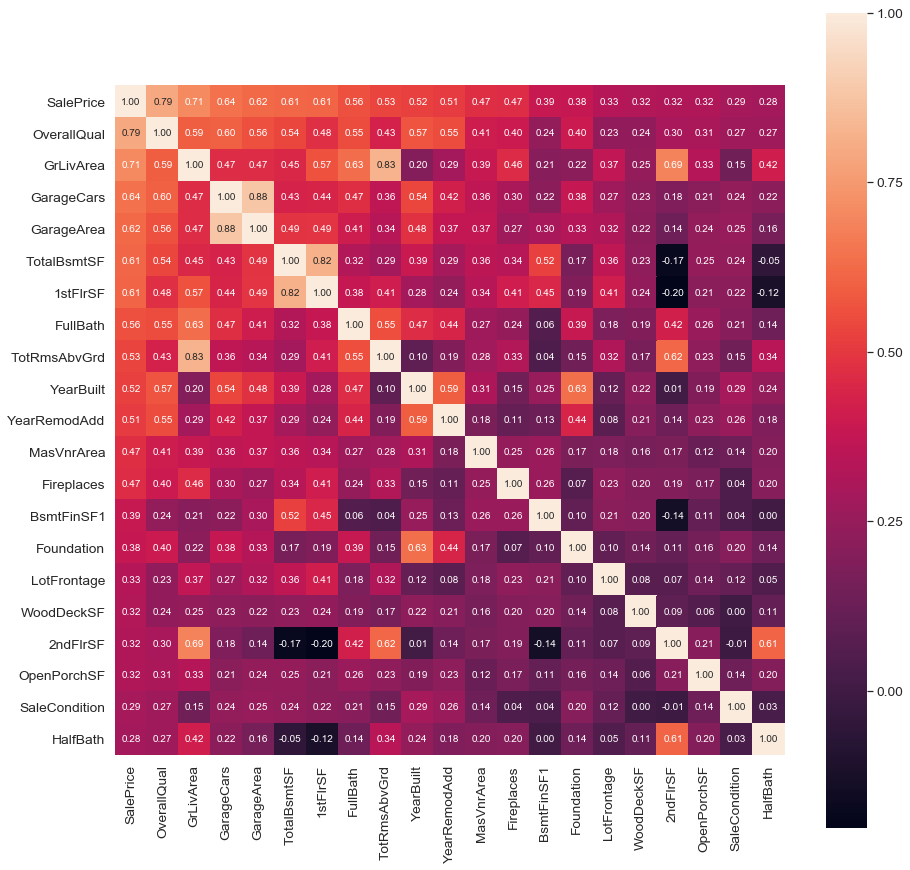

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'Foundation',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'SaleCondition',
       'HalfBath'],
      dtype='object')

In [18]:
import matplotlib.pyplot as plt
corrmat = train.corr()
# 関連が大きい順に
k = 21 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(15, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
cols